In [1]:
import pickle
import numpy as np
import pandas as pd

from analysis_utils import libraries_in_repos, libraries_in_files, modules_in_repos, modules_in_files, show_popularity, get_corr_table, show_correlations, show_correlation_matrix, transform_df

## Data Load and Setup

In [2]:
ipynb_imports_jupyter_repos = pd.read_parquet('../data/ipynb_imports_jupyter_repos.parquet')
ipynb_imports_python_repos = pd.read_parquet('../data/ipynb_imports_python_repos.parquet')
py_imports_jupyter_repos = pd.read_parquet('../data/py_imports_jupyter_repos.parquet')
py_imports_python_repos = pd.read_parquet('../data/py_imports_python_repos.parquet')

In [3]:
py_imports_python_repos_transformed = transform_df(py_imports_python_repos, imports_only=True)
py_imports_jupyter_repos_transformed = transform_df(py_imports_jupyter_repos, imports_only=True)
ipynb_imports_python_repos_transformed = transform_df(ipynb_imports_python_repos, imports_only=True)
ipynb_imports_jupyter_repos_transformed = transform_df(ipynb_imports_jupyter_repos, imports_only=True)

In [4]:
py_files_imports = pd.concat([py_imports_python_repos_transformed, py_imports_jupyter_repos_transformed])
ipynb_files_imports = pd.concat([ipynb_imports_python_repos_transformed, ipynb_imports_jupyter_repos_transformed])
all_files_imports = pd.concat([py_files_imports, ipynb_files_imports])

In [5]:
py_repo_count = py_files_imports['repo'].nunique()
py_file_count = py_files_imports['filename'].nunique()
ipynb_repo_count = ipynb_files_imports['repo'].nunique()
ipynb_file_count = ipynb_files_imports['filename'].nunique()
all_repo_count = all_files_imports['repo'].nunique()
all_file_count = all_files_imports['filename'].nunique()

## Most Popular Libraries

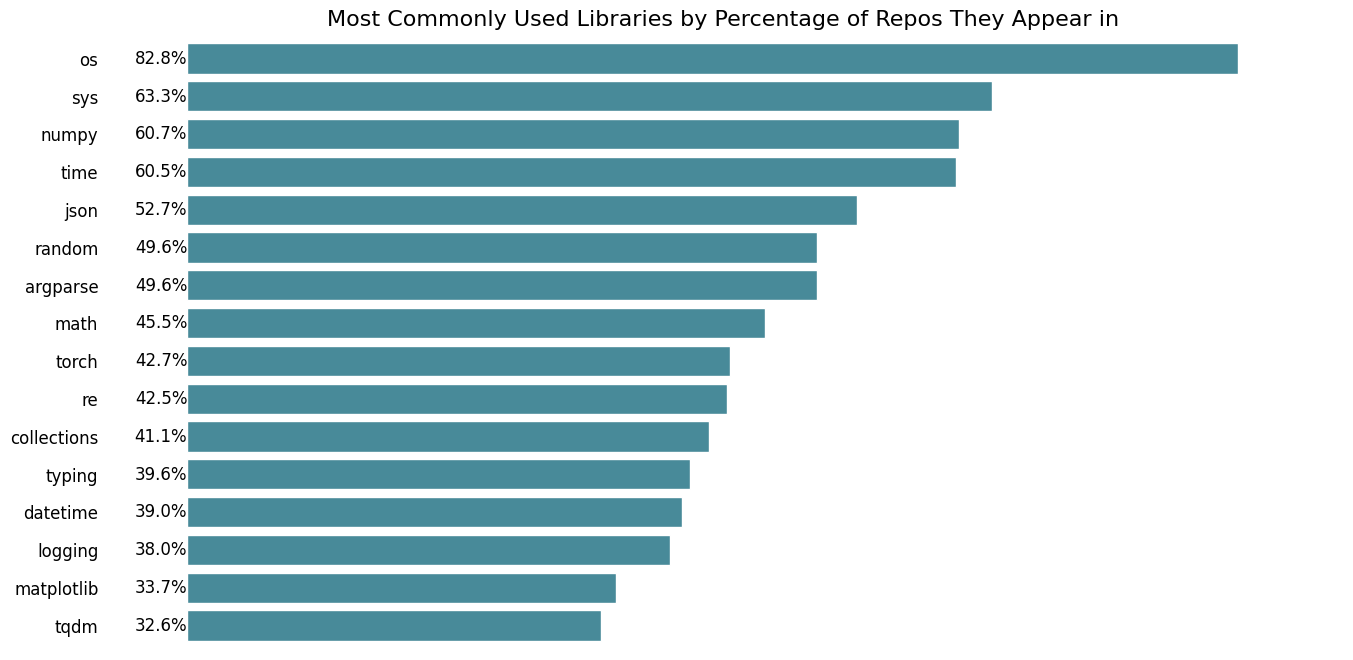

In [6]:
libraries_in_repos_df_all = libraries_in_repos(all_files_imports)
show_popularity(libraries_in_repos_df_all, 'Most Commonly Used Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

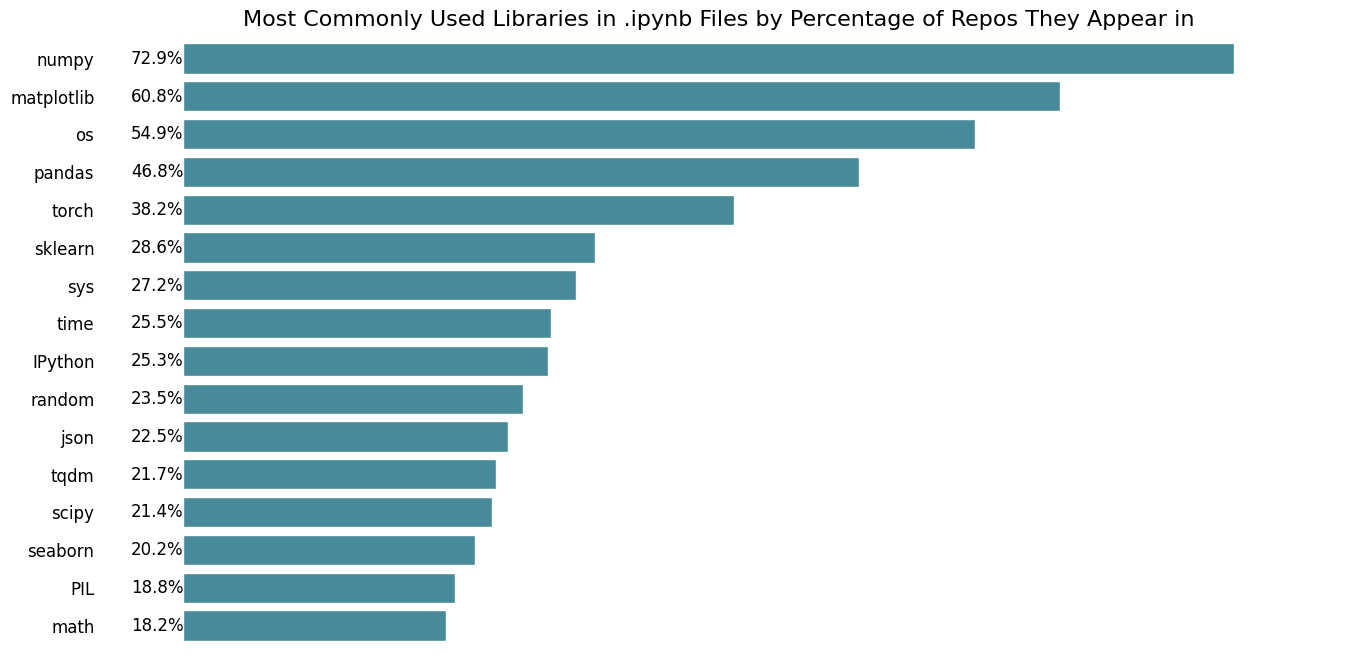

In [7]:
libraries_in_repos_df_ipynb = libraries_in_repos(ipynb_files_imports)
show_popularity(libraries_in_repos_df_ipynb, 'Most Commonly Used Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

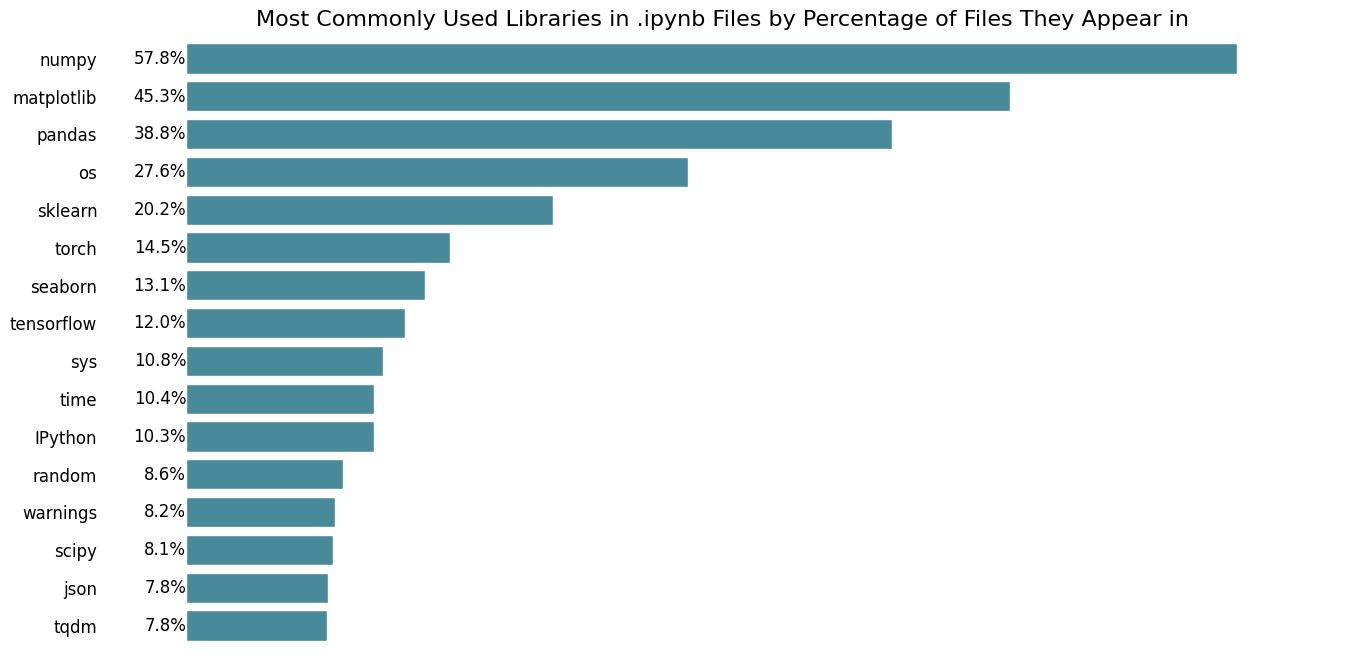

In [8]:
libraries_in_files_df_ipynb = libraries_in_files(ipynb_files_imports)
show_popularity(libraries_in_files_df_ipynb, 'Most Commonly Used Libraries in .ipynb Files by Percentage of Files They Appear in', 16, ipynb_file_count)

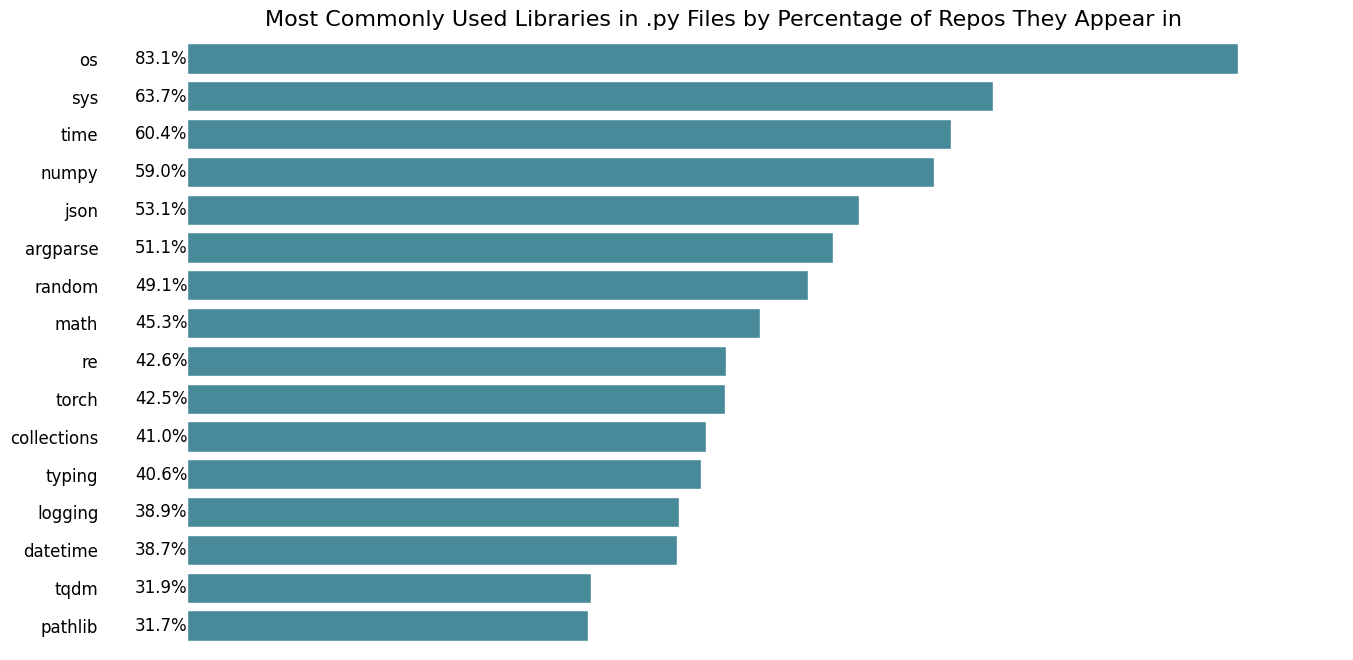

In [9]:
libraries_in_repos_df_py = libraries_in_repos(py_files_imports)
show_popularity(libraries_in_repos_df_py, 'Most Commonly Used Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

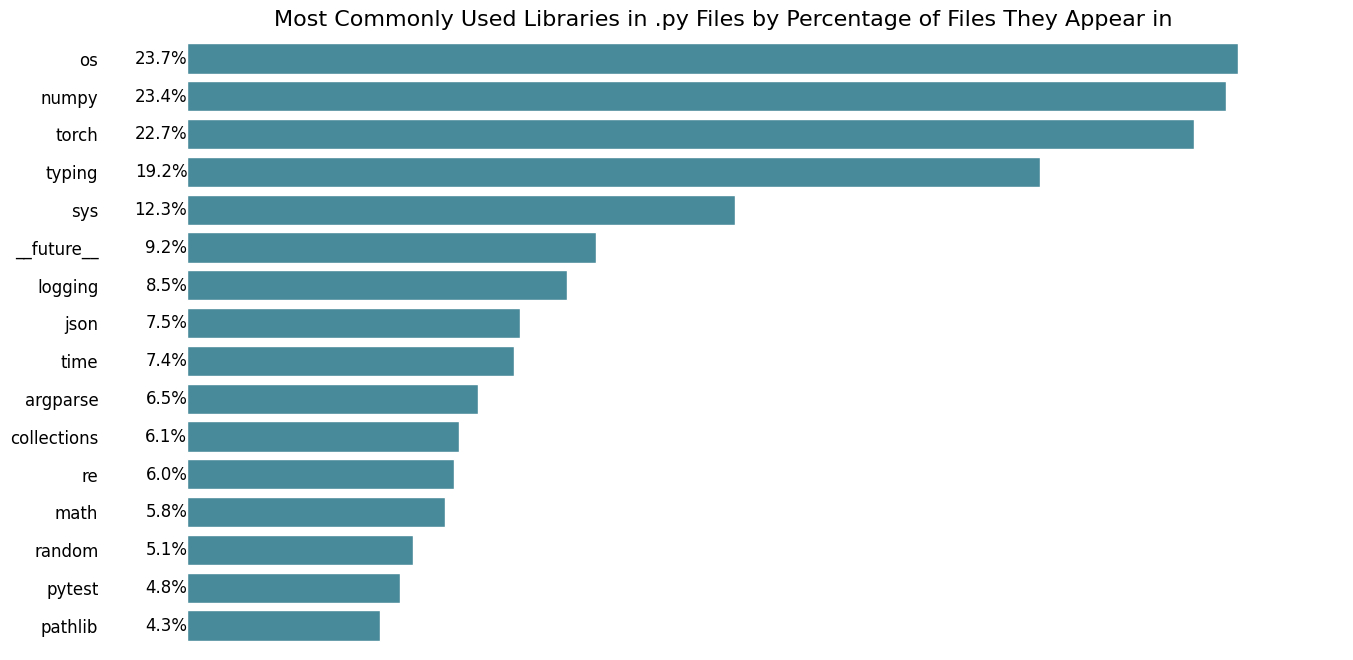

In [10]:
libraries_in_files_df_py = libraries_in_files(py_files_imports)
show_popularity(libraries_in_files_df_py, 'Most Commonly Used Libraries in .py Files by Percentage of Files They Appear in', 16, py_file_count)

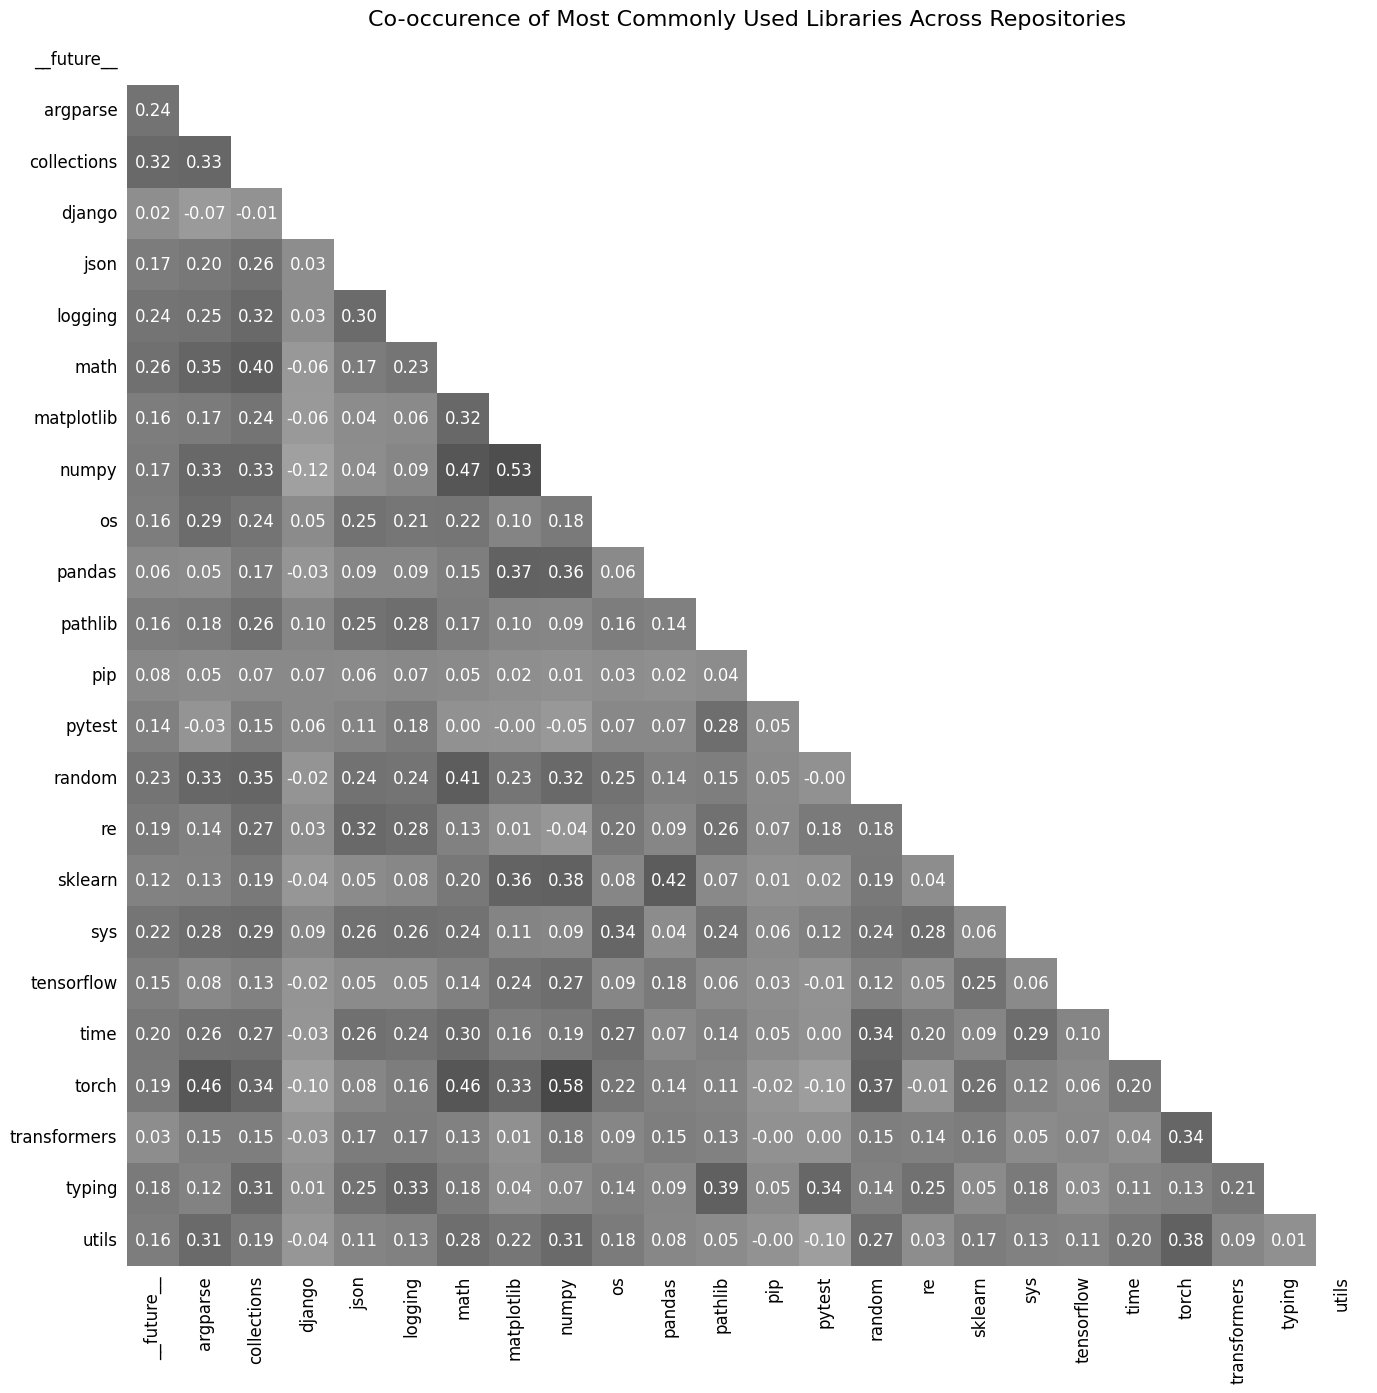

In [11]:
libs_in_repos_corr_all_files = get_corr_table(all_files_imports, index='repo', column='library')
show_correlation_matrix(libs_in_repos_corr_all_files, "Co-occurence of Most Commonly Used Libraries Across Repositories")

## Data Analysis Libraries

In [12]:
data_analysis_libs = ['pandas', 'numpy', 'scipy', 'statsmodels', 'dask', 'polars', 'sympy', 'patsy', 'modin', 'datatable', 'vaex', 'pyspark', 'koalas', 'cudf']

In [13]:
data_analysis_imports_all = all_files_imports[all_files_imports['library'].isin(data_analysis_libs)]
data_analysis_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(data_analysis_libs)]
data_analysis_imports_py = py_files_imports[py_files_imports['library'].isin(data_analysis_libs)]

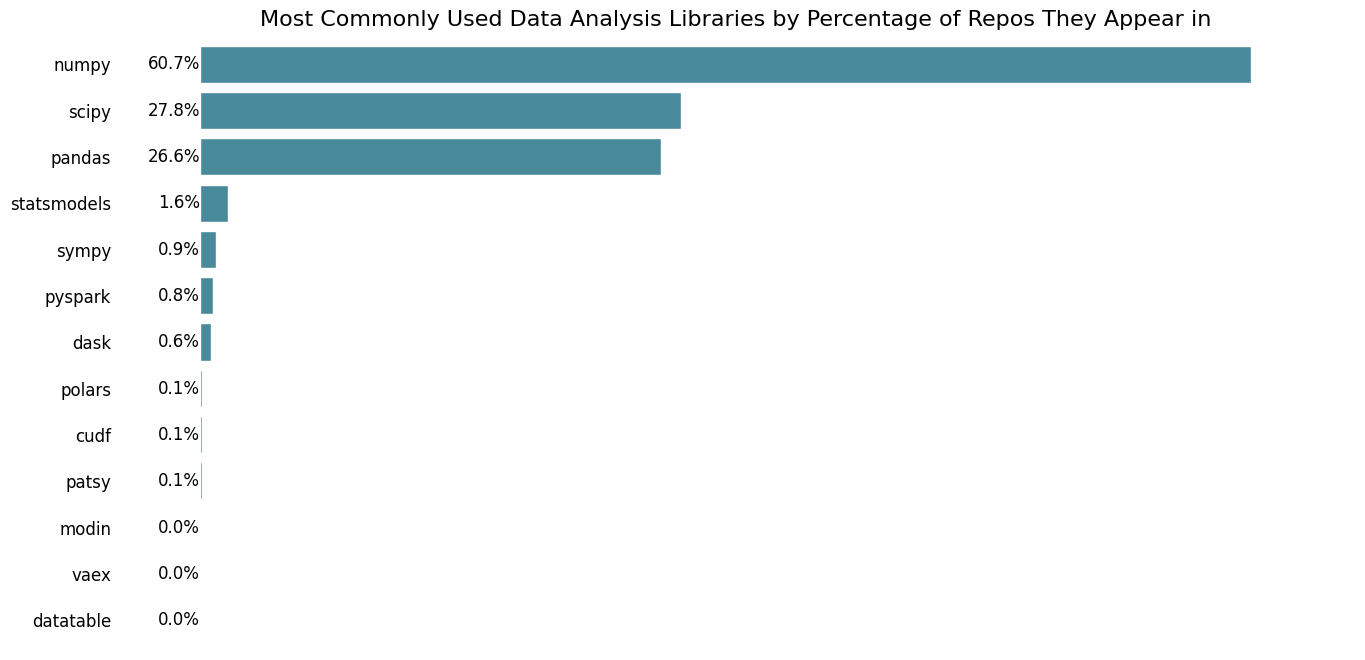

In [14]:
data_analysis_libraries_in_repos_df_all = libraries_in_repos(data_analysis_imports_all)
show_popularity(data_analysis_libraries_in_repos_df_all, 'Most Commonly Used Data Analysis Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

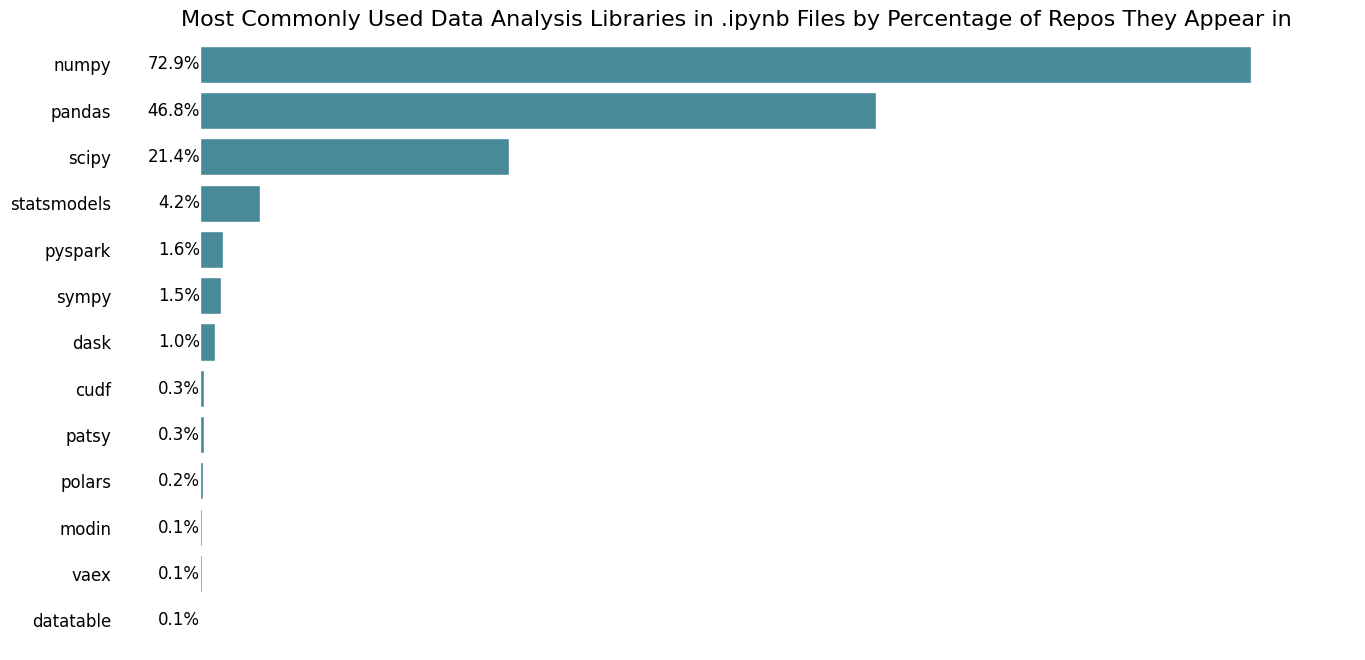

In [15]:
data_analysis_libraries_in_repos_df_ipynb = libraries_in_repos(data_analysis_imports_ipynb)
show_popularity(data_analysis_libraries_in_repos_df_ipynb, 'Most Commonly Used Data Analysis Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

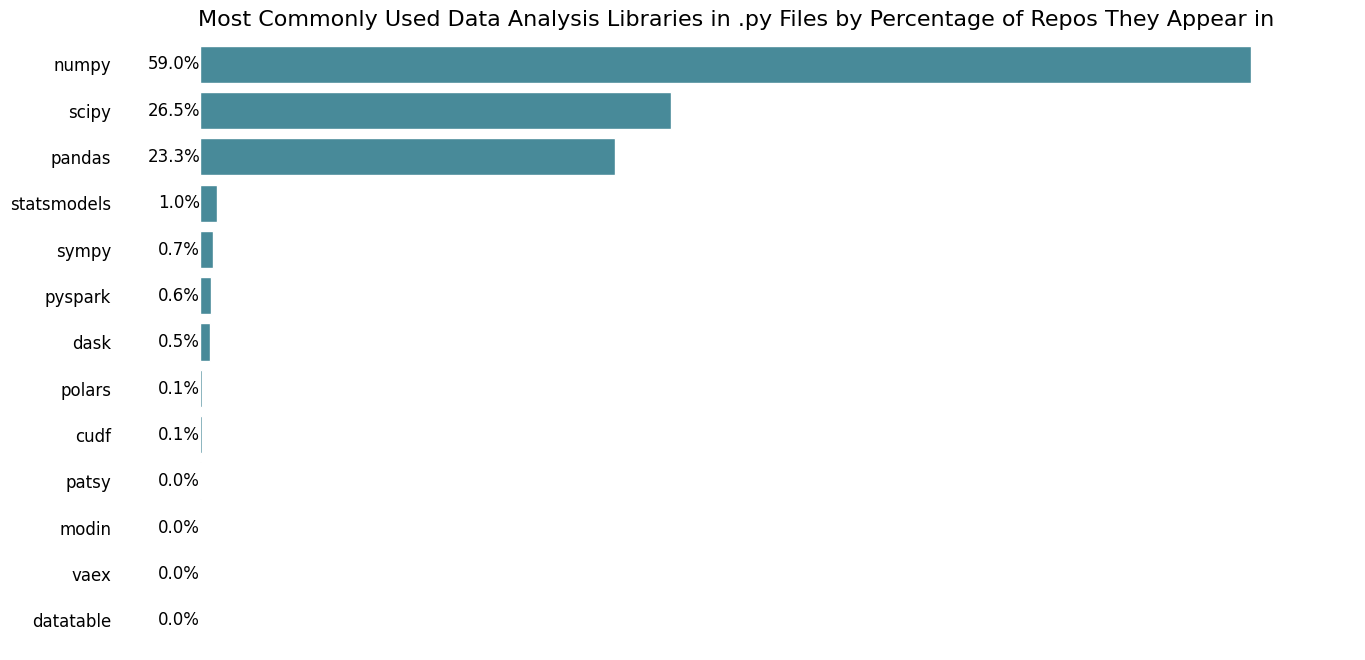

In [16]:
data_analysis_libraries_in_repos_df_py = libraries_in_repos(data_analysis_imports_py)
show_popularity(data_analysis_libraries_in_repos_df_py, 'Most Commonly Used Data Analysis Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

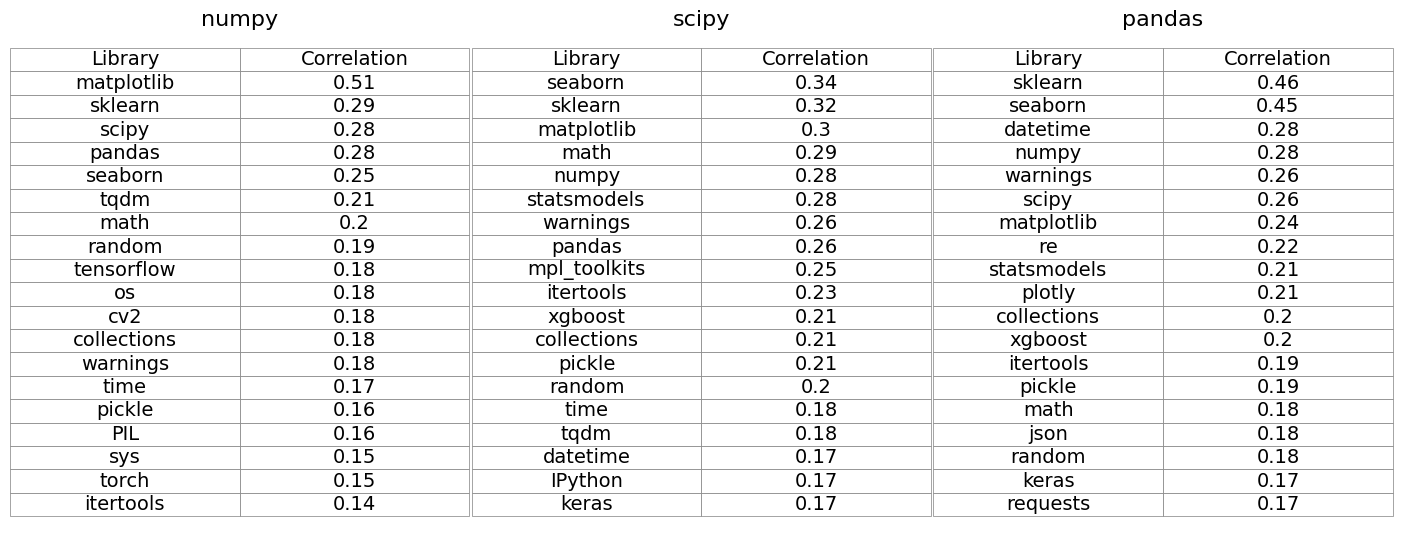

In [17]:
numpy_corr = get_corr_table(ipynb_files_imports, index='repo', column='library', top_n=100)['numpy'].sort_values(ascending=False).head(20)
scipy_corr = get_corr_table(ipynb_files_imports, index='repo', column='library', top_n=100)['scipy'].sort_values(ascending=False).head(20)
pandas_corr = get_corr_table(ipynb_files_imports, index='repo', column='library', top_n=100)['pandas'].sort_values(ascending=False).head(20)
show_correlations(numpy_corr, scipy_corr, pandas_corr)

## Visualisation Libraries

In [18]:
visualisation_libs = ['matplotlib', 'seaborn', 'bokeh', 'plotly', 'altair', 'ggplot', 'pygal', 'holoviews', 'geopandas', 'folium', 'dash']

In [19]:
visualisation_imports_all = all_files_imports[all_files_imports['library'].isin(visualisation_libs)]
visualisation_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(visualisation_libs)]
visualisation_imports_py = py_files_imports[py_files_imports['library'].isin(visualisation_libs)]

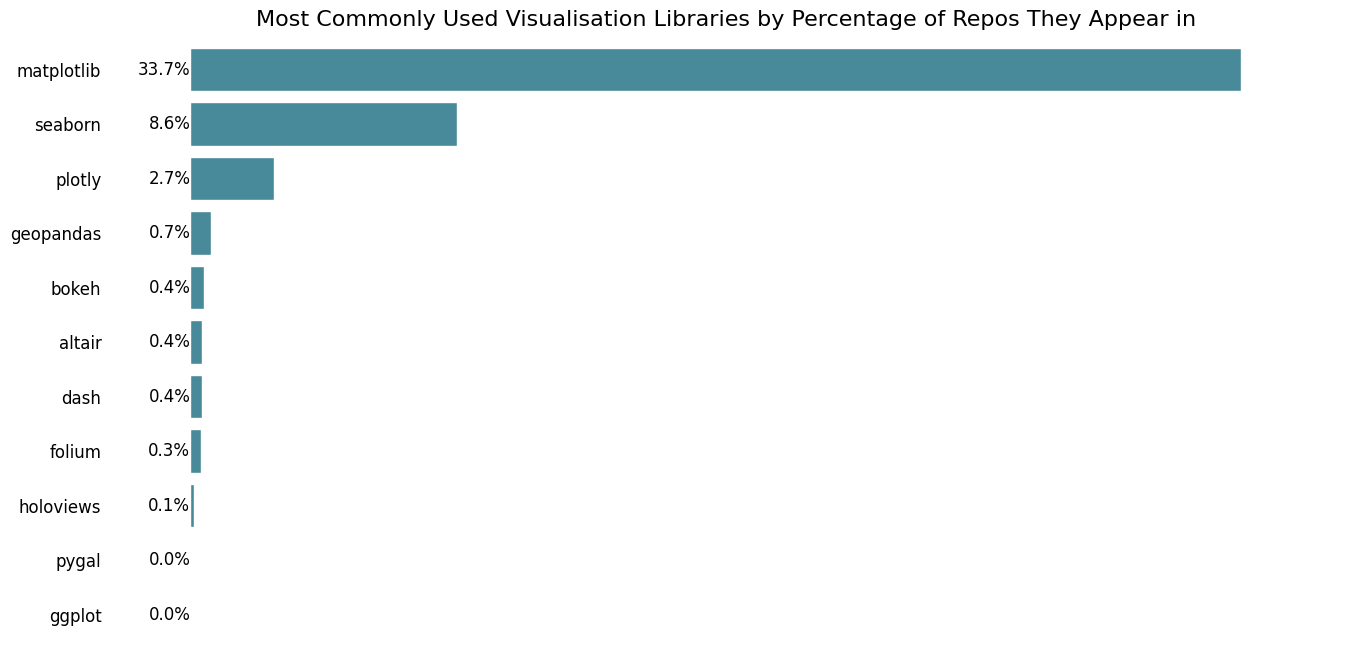

In [20]:
visualisation_libs_in_repos_df_all = libraries_in_repos(visualisation_imports_all)
show_popularity(visualisation_libs_in_repos_df_all, 'Most Commonly Used Visualisation Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

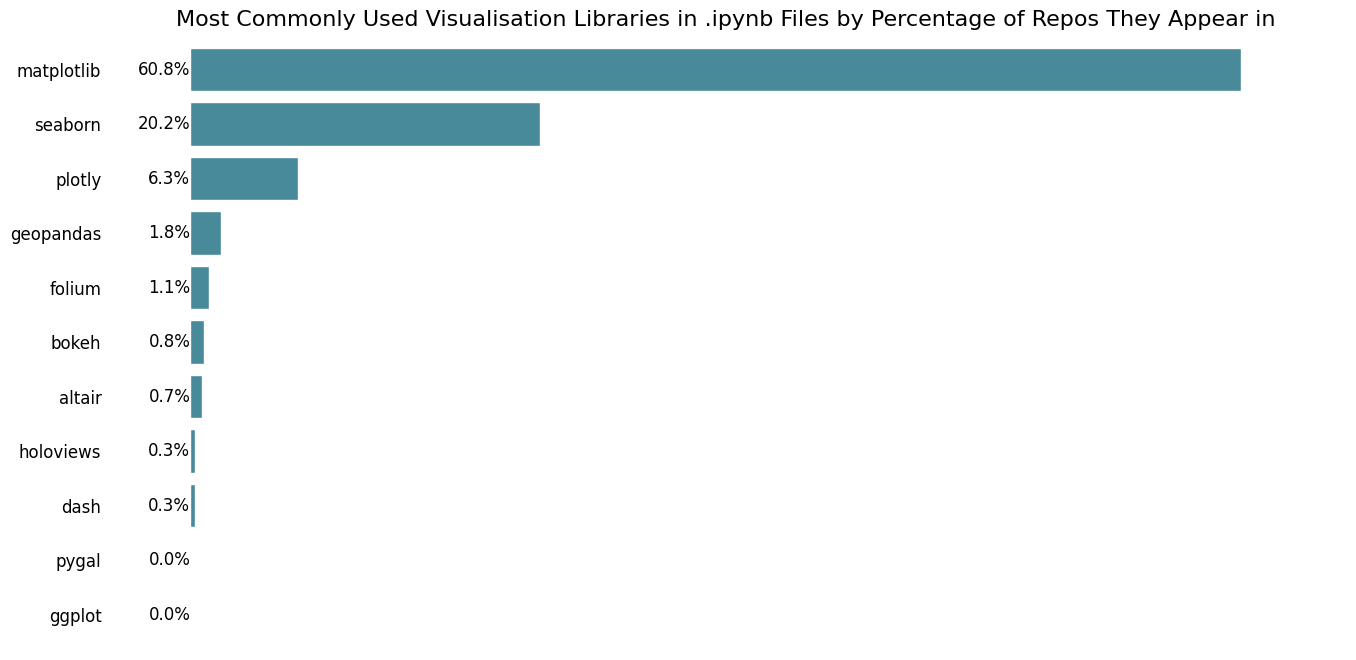

In [21]:
visualisation_libs_in_repos_df_ipynb = libraries_in_repos(visualisation_imports_ipynb)
show_popularity(visualisation_libs_in_repos_df_ipynb, 'Most Commonly Used Visualisation Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

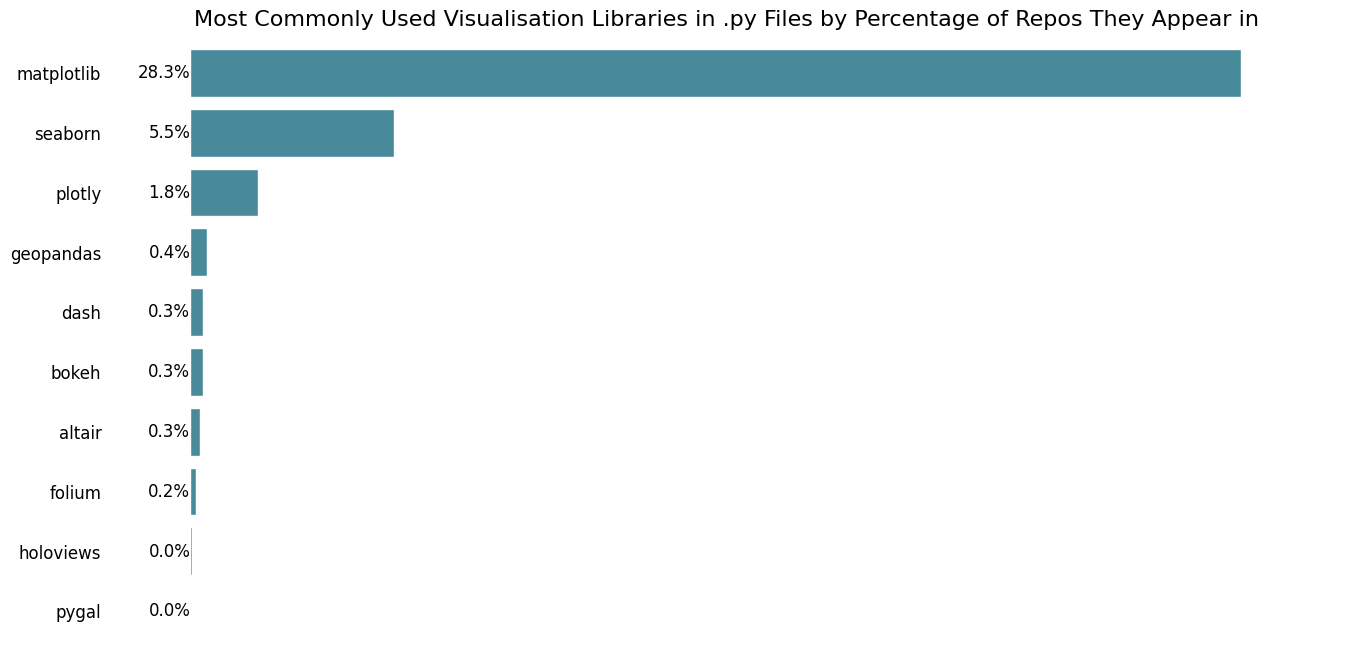

In [22]:
visualisation_libs_in_repos_df_py = libraries_in_repos(visualisation_imports_py)
show_popularity(visualisation_libs_in_repos_df_py, 'Most Commonly Used Visualisation Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## ML Libraries

In [23]:
ml_libs = ['sklearn', 'tensorflow', 'keras', 'xgboost', 'lightgbm', 'catboost', 'theano', 'caffe', 'torch']

In [24]:
ml_imports_all = all_files_imports[all_files_imports['library'].isin(ml_libs)]
ml_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(ml_libs)]
ml_imports_py = py_files_imports[py_files_imports['library'].isin(ml_libs)]

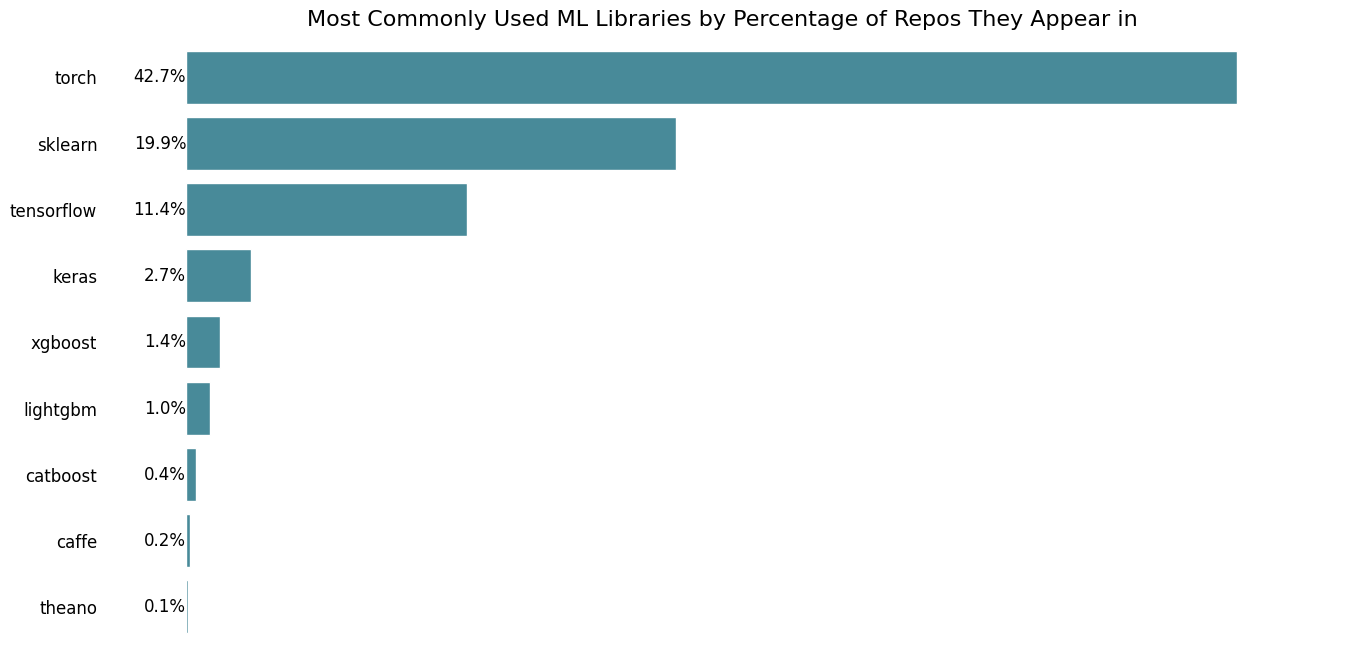

In [25]:
ml_libs_in_repos_df_all = libraries_in_repos(ml_imports_all)
show_popularity(ml_libs_in_repos_df_all, 'Most Commonly Used ML Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

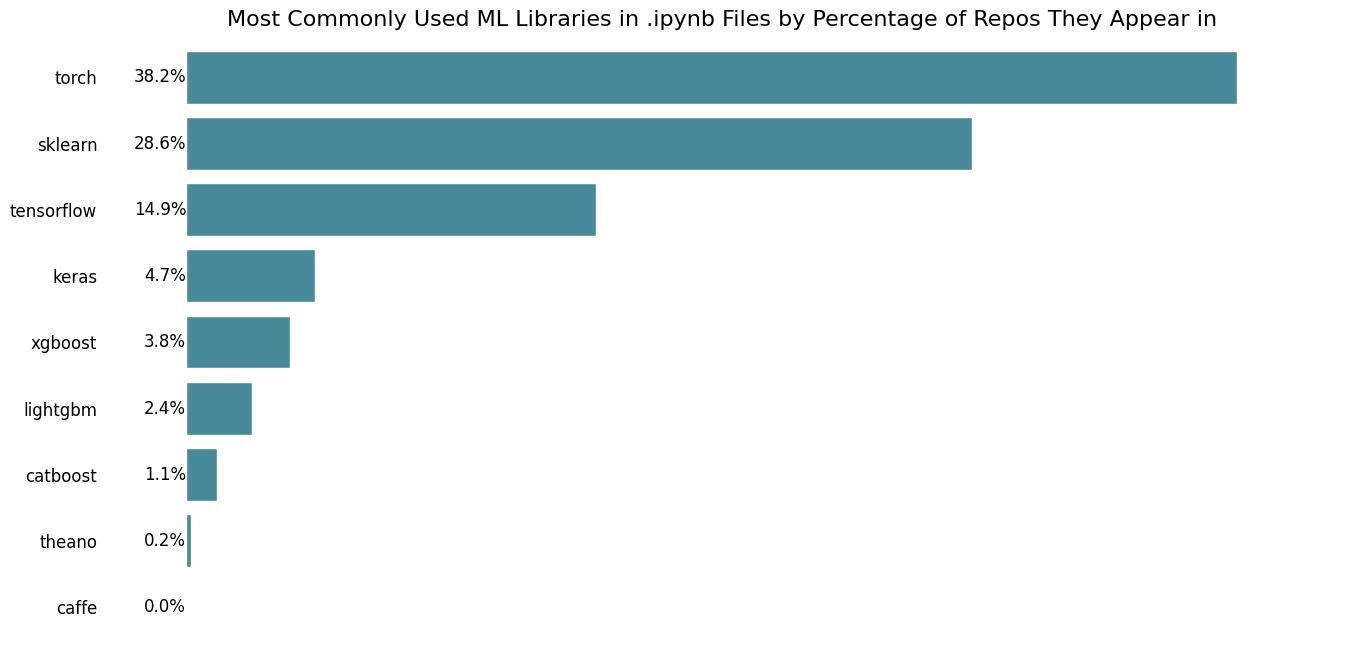

In [26]:
ml_libs_in_repos_df_ipynb = libraries_in_repos(ml_imports_ipynb)
show_popularity(ml_libs_in_repos_df_ipynb, 'Most Commonly Used ML Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

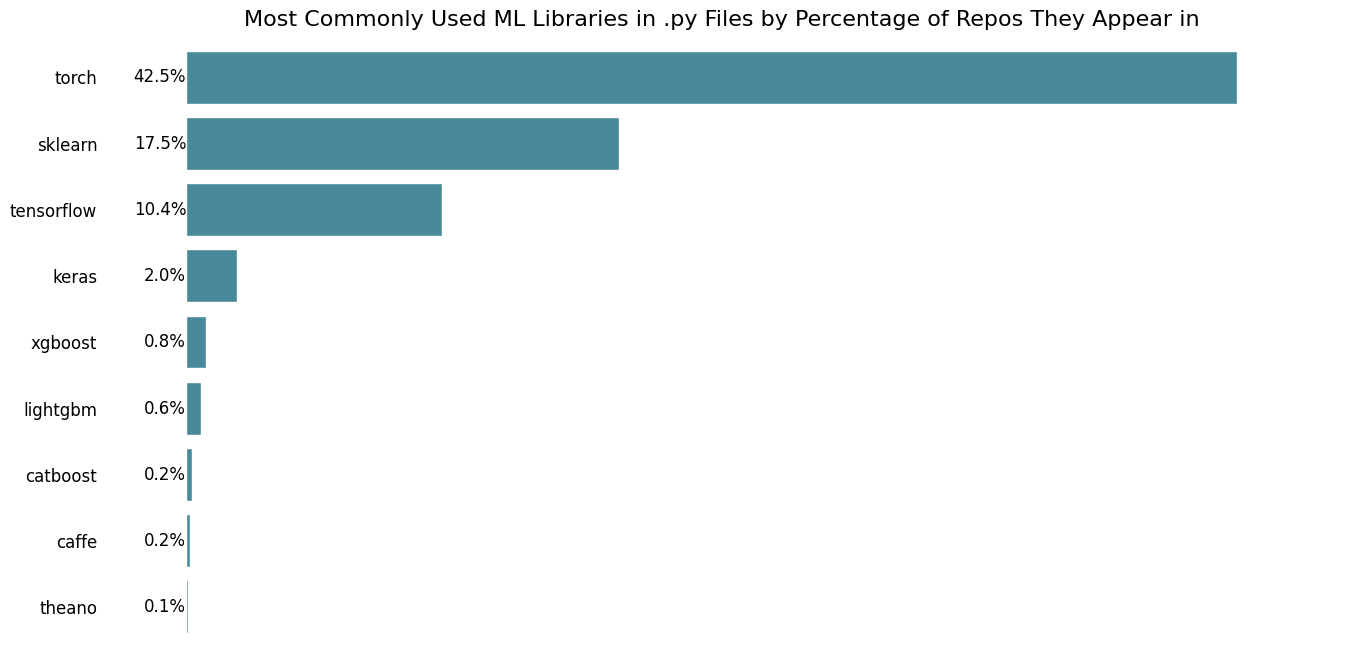

In [27]:
ml_libs_in_repos_df_py = libraries_in_repos(ml_imports_py)
show_popularity(ml_libs_in_repos_df_py, 'Most Commonly Used ML Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## NLP Libraries

In [28]:
nlp_libs = ['nltk', 'spacy', 'gensim', 'textblob', 'stanfordnlp', 'pattern', 'flair', 'transformers']

In [29]:
nlp_imports_all = all_files_imports[all_files_imports['library'].isin(nlp_libs)]
nlp_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(nlp_libs)]
nlp_imports_py = py_files_imports[py_files_imports['library'].isin(nlp_libs)]

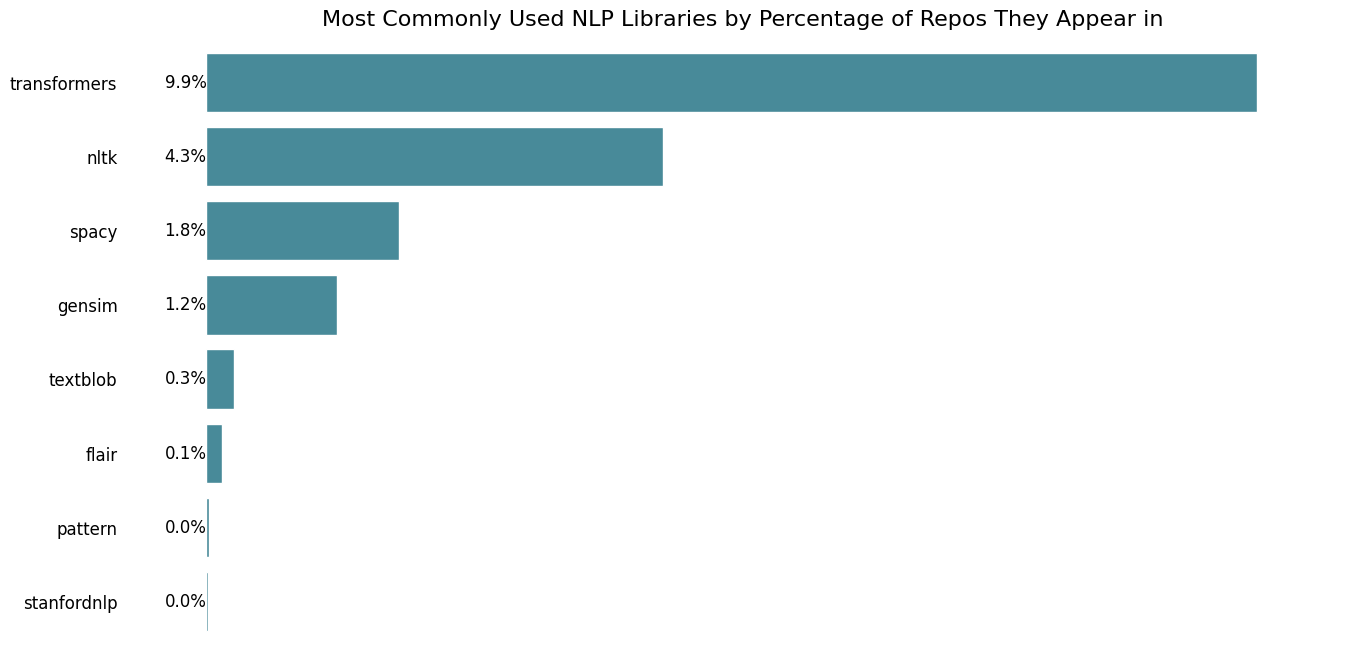

In [30]:
nlp_libs_in_repos_df_all = libraries_in_repos(nlp_imports_all)
show_popularity(nlp_libs_in_repos_df_all, 'Most Commonly Used NLP Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

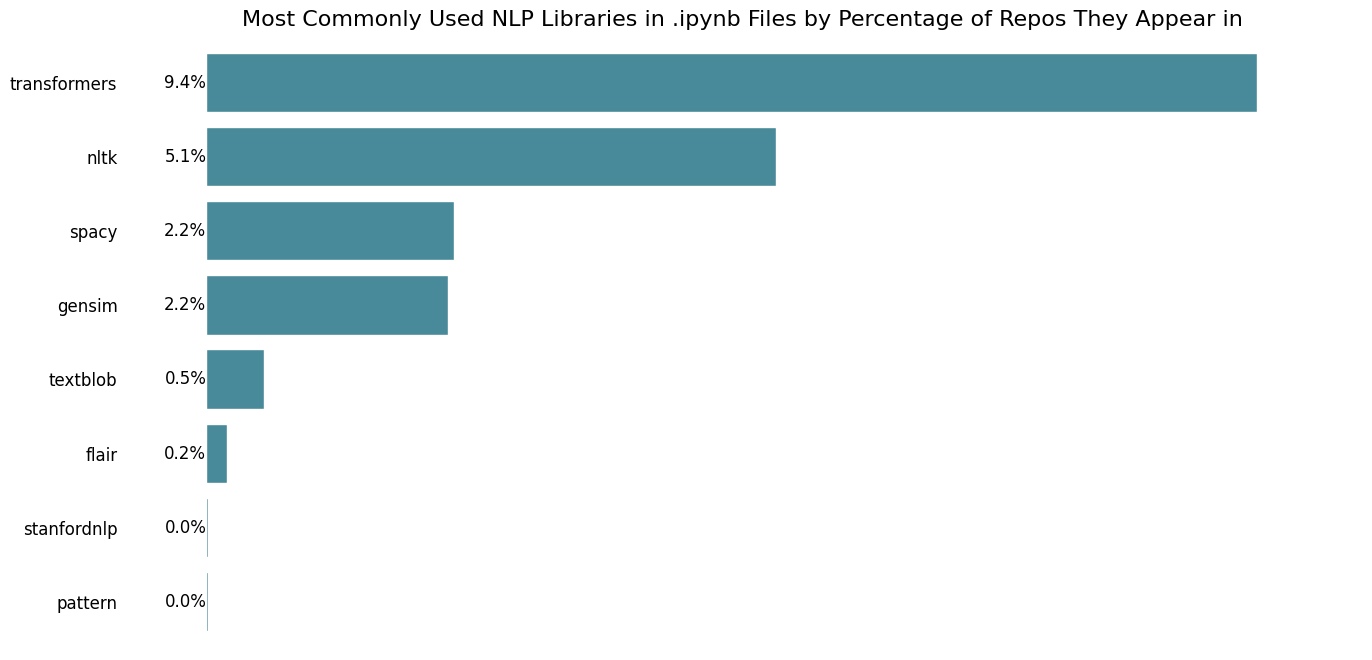

In [31]:
nlp_libs_in_repos_df_ipynb = libraries_in_repos(nlp_imports_ipynb)
show_popularity(nlp_libs_in_repos_df_ipynb, 'Most Commonly Used NLP Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

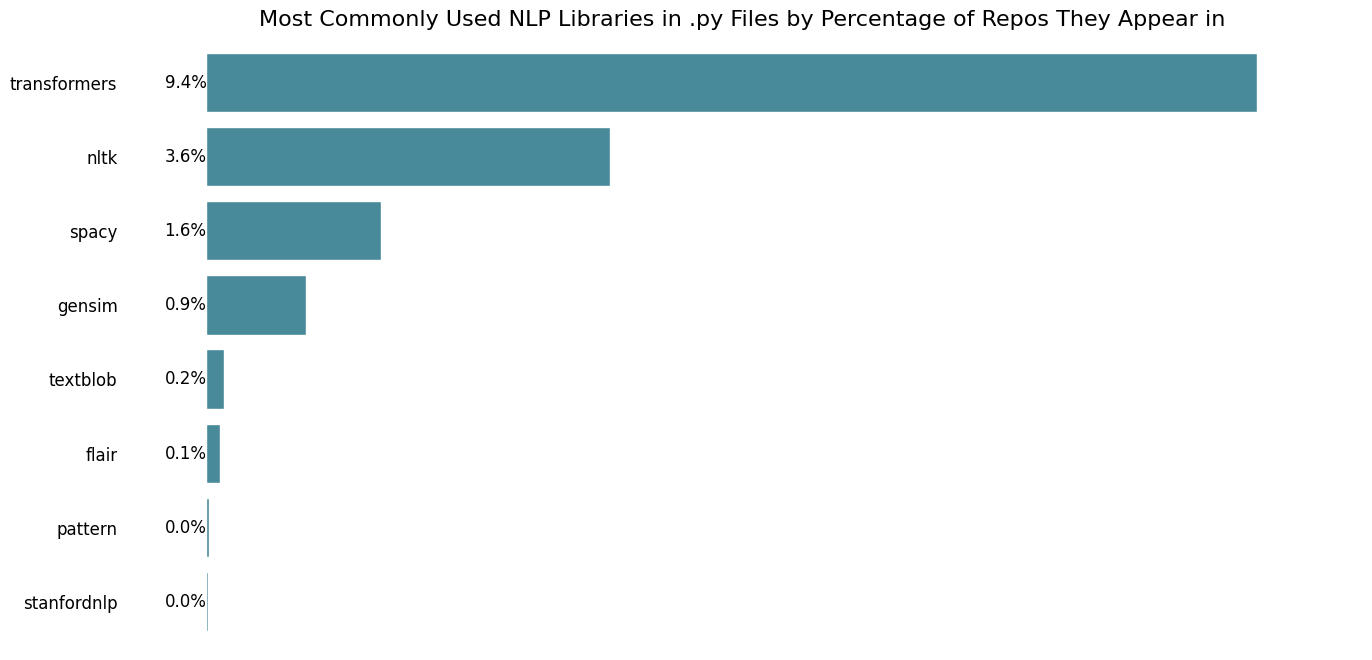

In [32]:
nlp_libs_in_repos_df_py = libraries_in_repos(nlp_imports_py)
show_popularity(nlp_libs_in_repos_df_py, 'Most Commonly Used NLP Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## Backend Libraries

In [33]:
backend_libs = ['django', 'flask', 'fastapi', 'pyramid', 'tornado', 'sanic', 'falcon', 'bottle', 'cherrypy', 'web2py']

In [34]:
backend_imports_all = all_files_imports[all_files_imports['library'].isin(backend_libs)]
backend_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(backend_libs)]
backend_imports_py = py_files_imports[py_files_imports['library'].isin(backend_libs)]

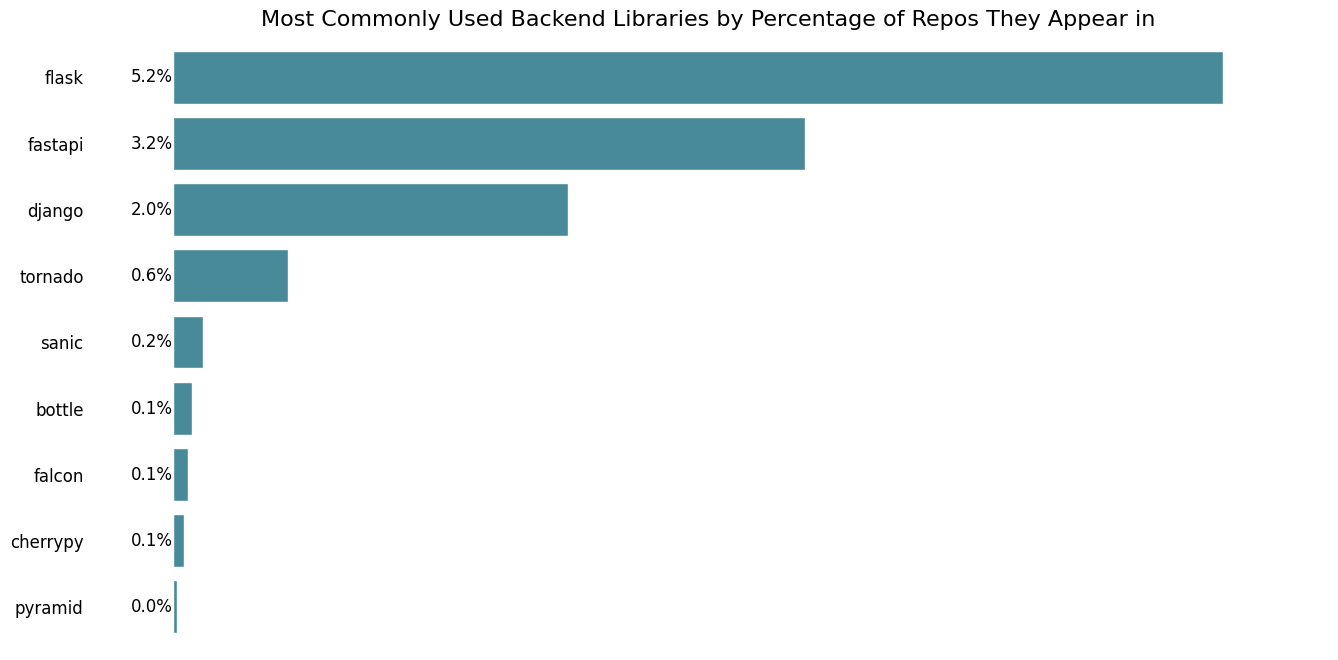

In [35]:
backend_libs_in_repos_df_all = libraries_in_repos(backend_imports_all)
show_popularity(backend_libs_in_repos_df_all, 'Most Commonly Used Backend Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

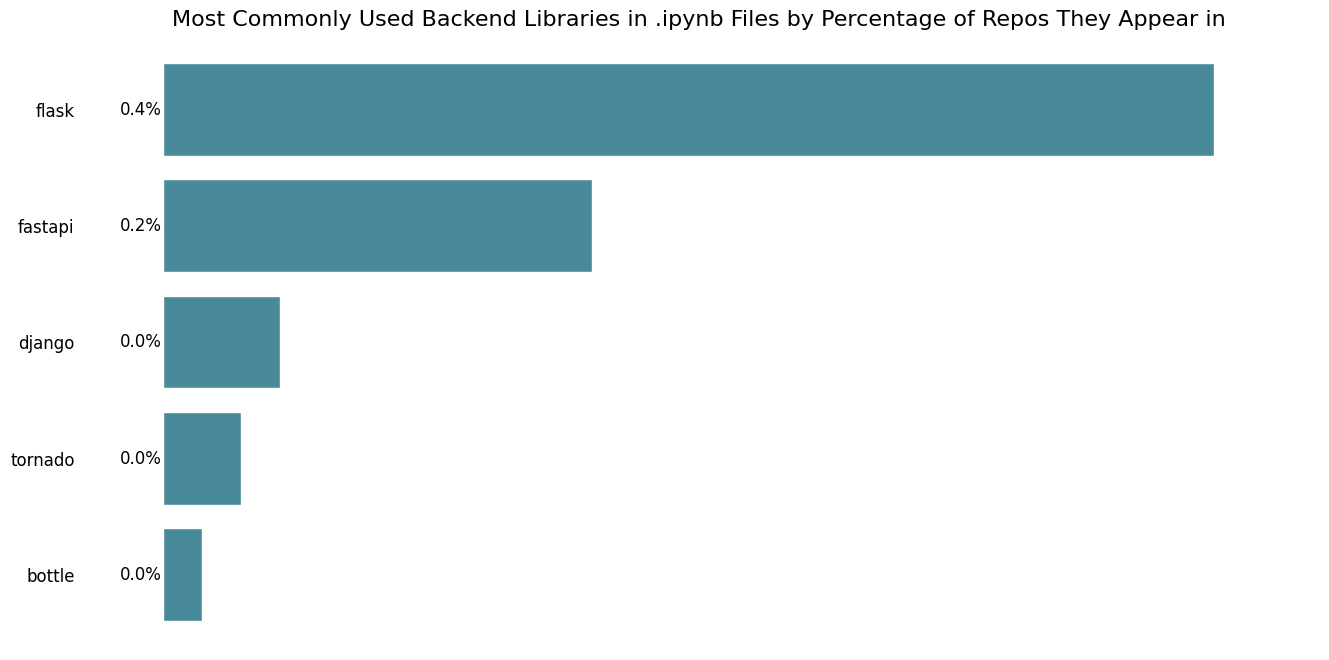

In [36]:
backend_libs_in_repos_df_ipynb = libraries_in_repos(backend_imports_ipynb)
show_popularity(backend_libs_in_repos_df_ipynb, 'Most Commonly Used Backend Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

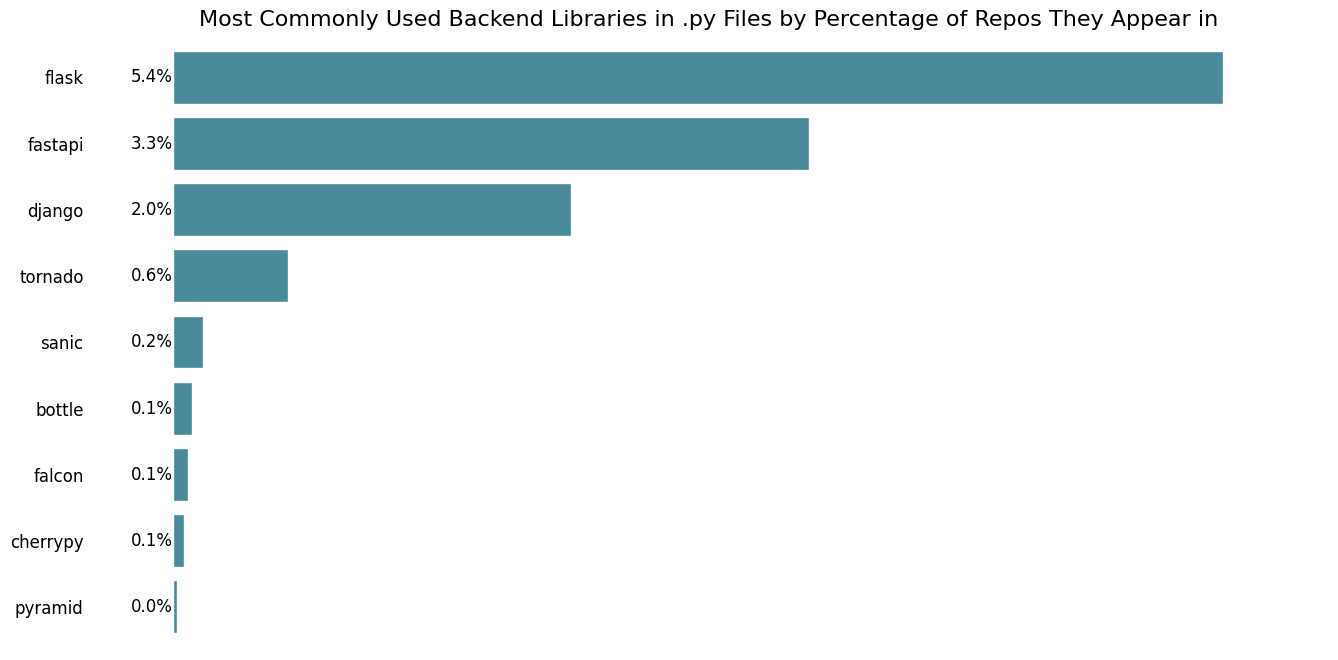

In [37]:
backend_libs_in_repos_df_py = libraries_in_repos(backend_imports_py)
show_popularity(backend_libs_in_repos_df_py, 'Most Commonly Used Backend Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)